In [1]:
import pandas as pd
import numpy as np
import os
print(os.listdir("./data"))
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

['WorldCupMatches.csv', 'WorldCupPlayers.csv', 'WorldCups.csv']


In [2]:
#read Data
world_cups=pd.read_csv("./data/WorldCups.csv")
world_cup_players=pd.read_csv("./data/WorldCupPlayers.csv")
world_cup_matches=pd.read_csv("./data/WorldCupMatches.csv")

In [3]:
world_cups = world_cups.replace('Germany FR', 'Germany')
world_cups = world_cups.replace('Korea Republic', 'Korea')
world_cups = world_cups.replace('Soviet Union', 'Soviet')
world_cup_players = world_cup_players.replace('Germany FR', 'Germany')
world_cup_matches = world_cup_matches.replace('Germany FR', 'Germany')

In [4]:
world_cups.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [5]:
world_cup_players.head(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
world_cup_matches.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


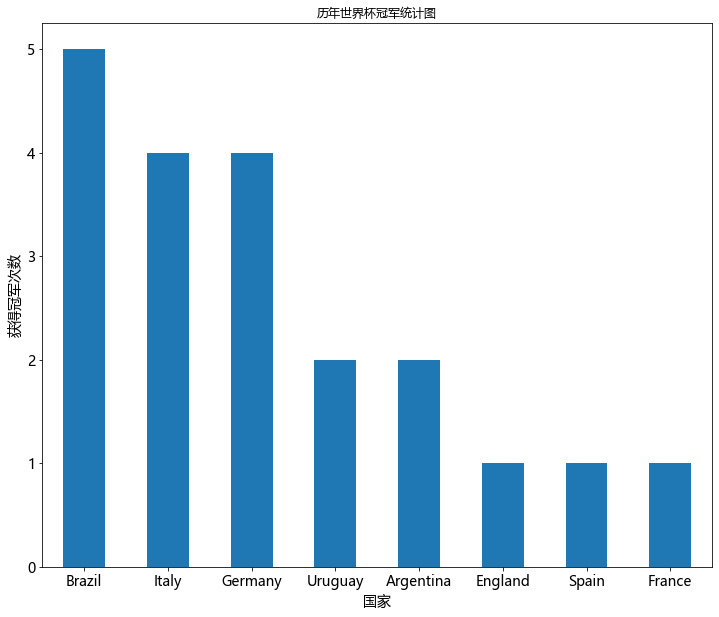

In [7]:
plt.rc("font", family='Microsoft YaHei')
fig=plt.figure()
winner=world_cups['Winner'].value_counts()
winner.plot(kind='bar',title="历年世界杯冠军统计图",fontsize=14,figsize=(12,10))
plt.xlabel('国家',fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('获得冠军次数',fontsize=14)
plt.savefig('冠军柱形图')
plt.show()

获奖过的国家
['Argentina', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Chile', 'Croatia', 'Czechoslovakia', 'England', 'France', 'Germany', 'Hungary', 'Italy', 'Korea', 'Netherlands', 'Poland', 'Portugal', 'Soviet', 'Spain', 'Sweden', 'Turkey', 'USA', 'Uruguay', 'Yugoslavia', '']


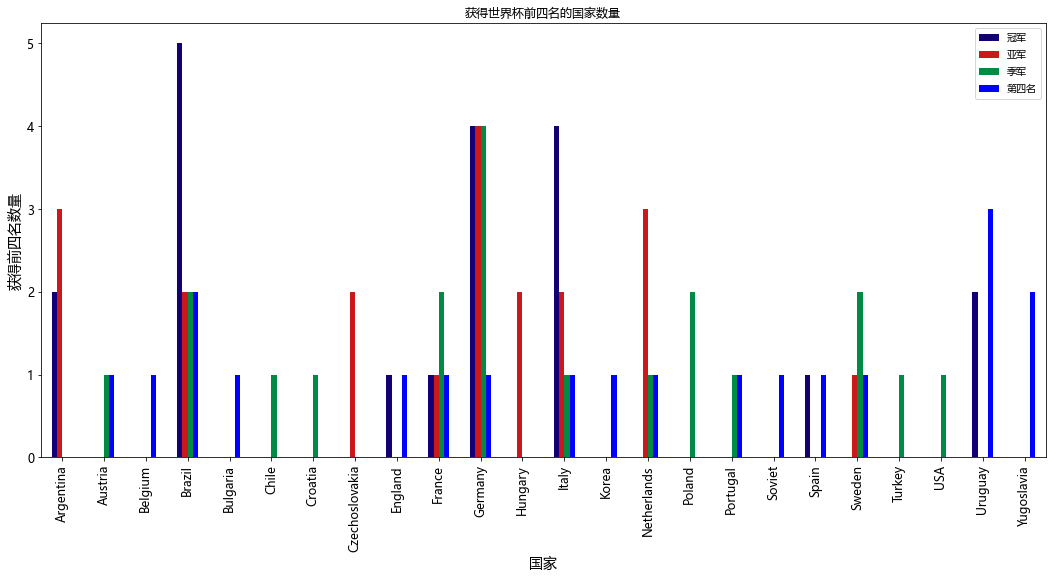

In [73]:
all_pos=world_cups[['Winner','Runners-Up','Third','Fourth']]
all_positions=all_pos.apply(pd.value_counts).fillna(0).astype(int)
print("获奖过的国家")
str = ""
for i in all_positions.index:
    str += i+" "
list_str = str.split(" ")
print(list_str)
all_positions.plot(y=['Winner','Runners-Up','Third','Fourth'],kind='bar',title="获得世界杯前四名的国家数量",
                   fontsize=12,figsize=(18,8),color=['#130074', '#CB181B', '#008B45', 'b'],
                   label=['冠军','亚军','季军','第四名'])
plt.xlabel('国家',fontsize=14)
plt.ylabel('获得前四名数量',fontsize=14)
# plt.savefig('柱形图统计前四名')
plt.show()

C:\Users\Mono\AppData\Local\Temp\ipykernel_29716\3653215482.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Half_time=world_cup_matches.groupby('Year')['Half-time Home Goals','Half-time Away Goals'].sum().reset_index().astype(int)


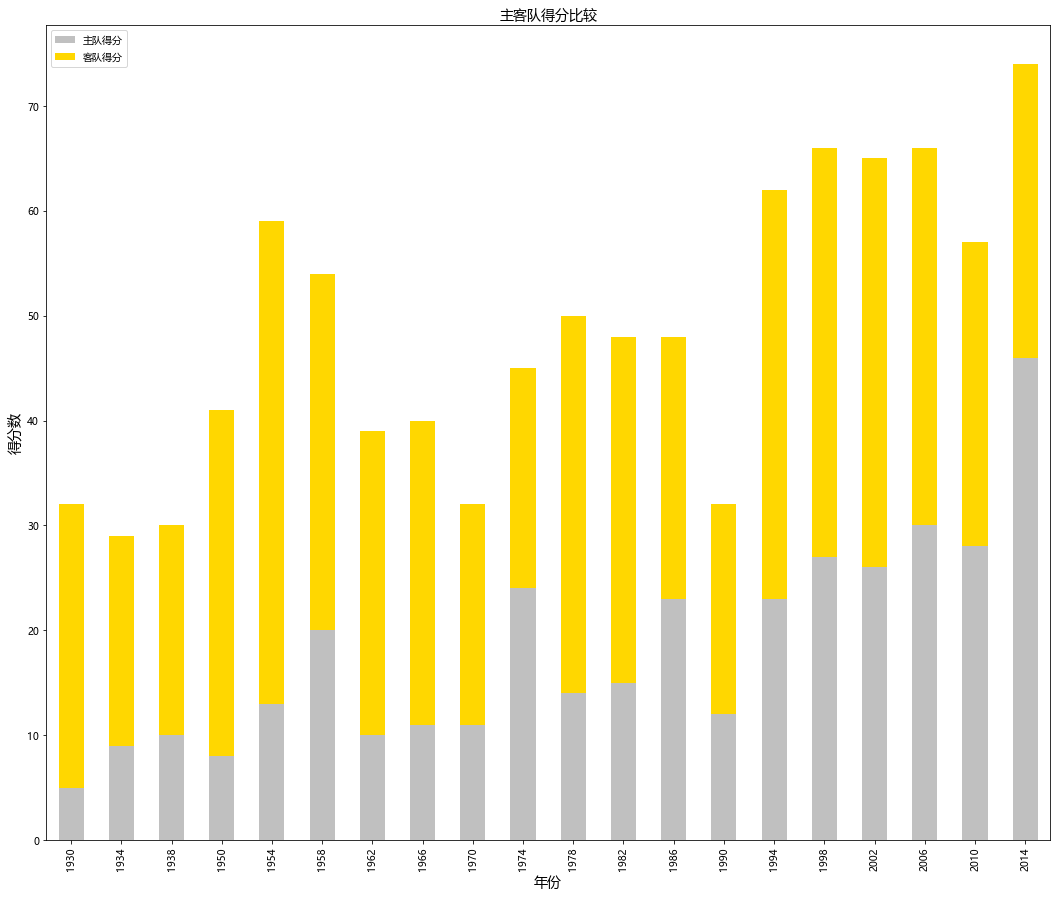

In [8]:
#Half time Goals of home and away team
Half_time=world_cup_matches.groupby('Year')['Half-time Home Goals','Half-time Away Goals'].sum().reset_index().astype(int)
df=pd.DataFrame({'Half-time Away Goals':Half_time['Half-time Away Goals'],'Half-time Home Goals':Half_time['Half-time Home Goals']})
df.plot(kind='bar',stacked=True,figsize=(18,15),color =['silver','gold'])
plt.title('主客队得分比较',fontsize=14)
r=range(0,20)
plt.xticks(r,Half_time['Year'])
plt.xlabel('年份',fontsize=14)
plt.ylabel('得分数',fontsize=14)
plt.legend(labels = ['主队得分','客队得分'])
plt.savefig('堆积柱形图')
plt.show()

In [9]:
home_team1=world_cup_matches[['Year','Home Team Goals']]
home_team1.head(840)

# plt.figure(figsize=(30,15))
#主队
# plt.subplot(121)
home_team=world_cup_matches[['Year','Home Team Goals']].head(840).astype(int)
away_team=world_cup_matches[['Year','Away Team Goals']].head(840).astype(int)
team = pd.concat([home_team, away_team], axis=1, join='inner')
print(type(team))
print(team)
plt.figure(figsize=(30,10))
sns.violinplot(x="Year",y="Home Team Goals",hue="Away Team Goals",data = team,palette='Blues')
plt.grid(True,color='grey',alpha=0.3)
plt.title("主队得分分布小提琴图",fontsize=16)
plt.xlabel('年份',fontsize=16)
plt.ylabel('主队得分',fontsize=16)
plt.show()

<class 'pandas.core.frame.DataFrame'>
     Year  Home Team Goals  Year  Away Team Goals
0    1930                4  1930                1
1    1930                3  1930                0
2    1930                2  1930                1
3    1930                3  1930                1
4    1930                1  1930                0
..    ...              ...   ...              ...
835  2014                2  2014                1
836  2014                1  2014                1
837  2014                2  2014                0
838  2014                2  2014                1
839  2014                1  2014                1

[840 rows x 4 columns]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 2160x720 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
     Year  Home Team Goals  Year  Away Team Goals
0    1930                4  1930                1
1    1930                3  1930                0
2    1930                2  1930                1
3    1930                3  1930                1
4    1930                1  1930                0
..    ...              ...   ...              ...
835  2014                2  2014                1
836  2014                1  2014                1
837  2014                2  2014                0
838  2014                2  2014                1
839  2014                1  2014                1

[840 rows x 4 columns]


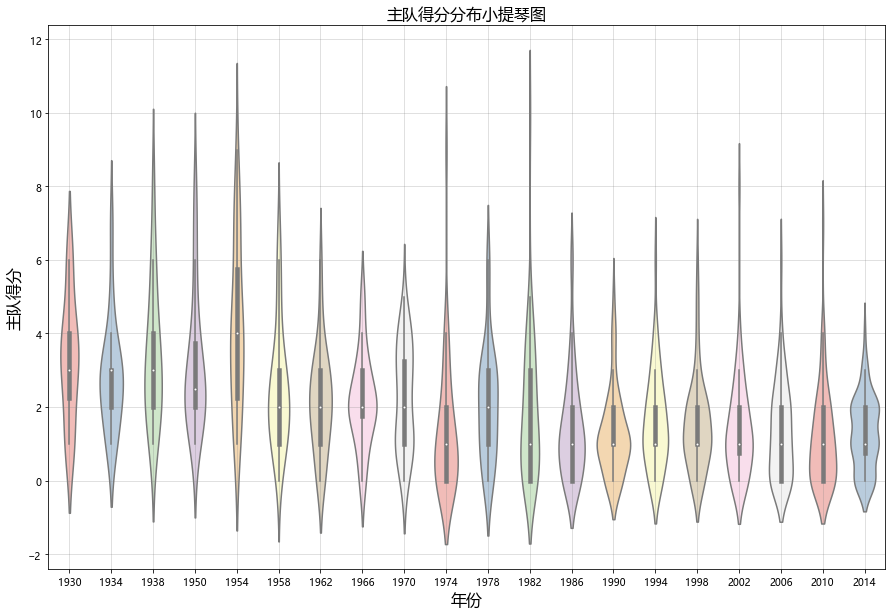

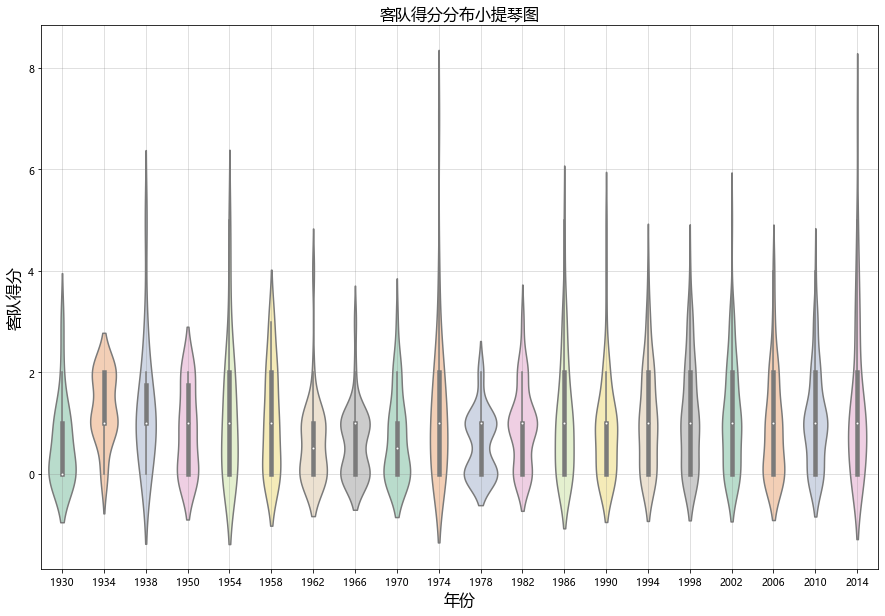

In [10]:
home_team1=world_cup_matches[['Year','Home Team Goals']]
home_team1.head(840)

# plt.figure(figsize=(30,15))
#主队
# plt.subplot(121)
home_team=world_cup_matches[['Year','Home Team Goals']].head(840).astype(int)
away_team=world_cup_matches[['Year','Away Team Goals']].head(840).astype(int)
team = pd.concat([home_team, away_team], axis=1, join='inner')
print(type(team))
print(team)
plt.figure(figsize=(15,10))
sns.violinplot(x=home_team['Year'],y=home_team['Home Team Goals'],palette='Pastel1')
plt.grid(True,color='grey',alpha=0.3)
plt.title("主队得分分布小提琴图",fontsize=16)
plt.xlabel('年份',fontsize=16)
plt.ylabel('主队得分',fontsize=16)
plt.savefig('小提琴图1')
plt.show()
#客队  Away Team Goals
# plt.subplot(122)
away_team=world_cup_matches[['Year','Away Team Goals']].head(840).astype(int)
plt.figure(figsize=(15,10))
sns.violinplot(x=away_team['Year'],y=away_team['Away Team Goals'],palette='Pastel2')
plt.grid(True,color='grey',alpha=0.3)
plt.title("客队得分分布小提琴图",fontsize=16)
plt.xlabel('年份',fontsize=16)
plt.ylabel('客队得分',fontsize=16)
plt.savefig('小提琴图2')
plt.show()


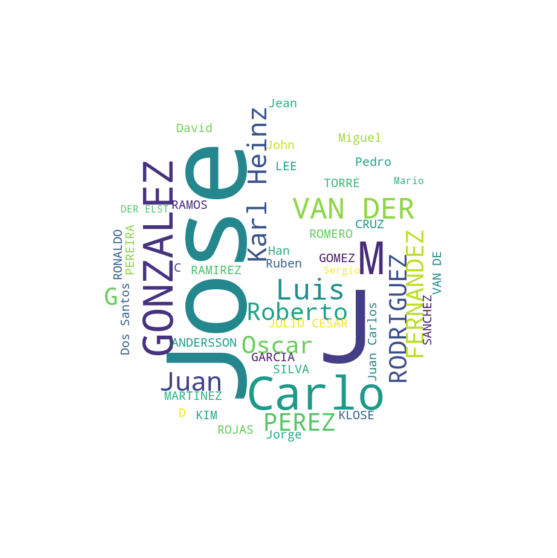

In [32]:

#player names
from PIL import Image
plt.figure(figsize=(15,10))
name=np.array(Image.open('zu.jpg'))
worldcloud=WordCloud(scale=4,background_color='white',mask=name,max_words=5000,mode='RGBA').generate(' '.join(world_cup_players['Player Name']))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('球员图')
plt.show()

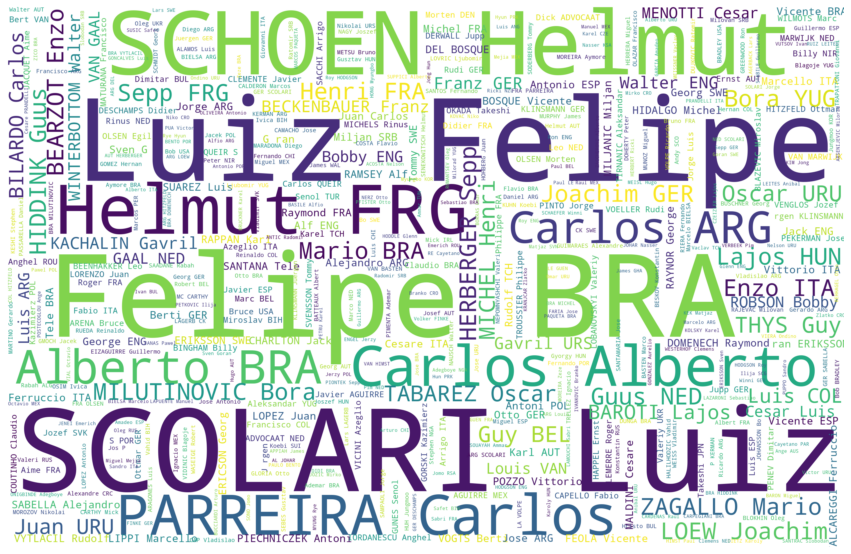

In [37]:
plt.figure(figsize=(15,10))
name=np.array(Image.open('tiqiu.jpg'))
wordcloud=WordCloud(scale=4,background_color='white',mask=name,max_words=5000).generate(' '.join(world_cup_players['Coach Name']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('教练图')
plt.show()